In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud  import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report

import re,string

In [50]:
df = pd.read_csv('../datasets/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [51]:
df.shape

(962, 2)

In [52]:
#separating input output

x = df['Resume']
y = df['Category']

<Axes: xlabel='count', ylabel='Category'>

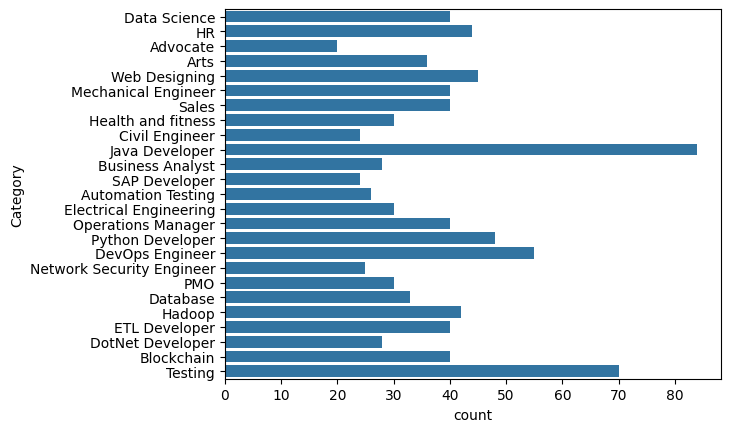

In [53]:
sns.countplot(y)

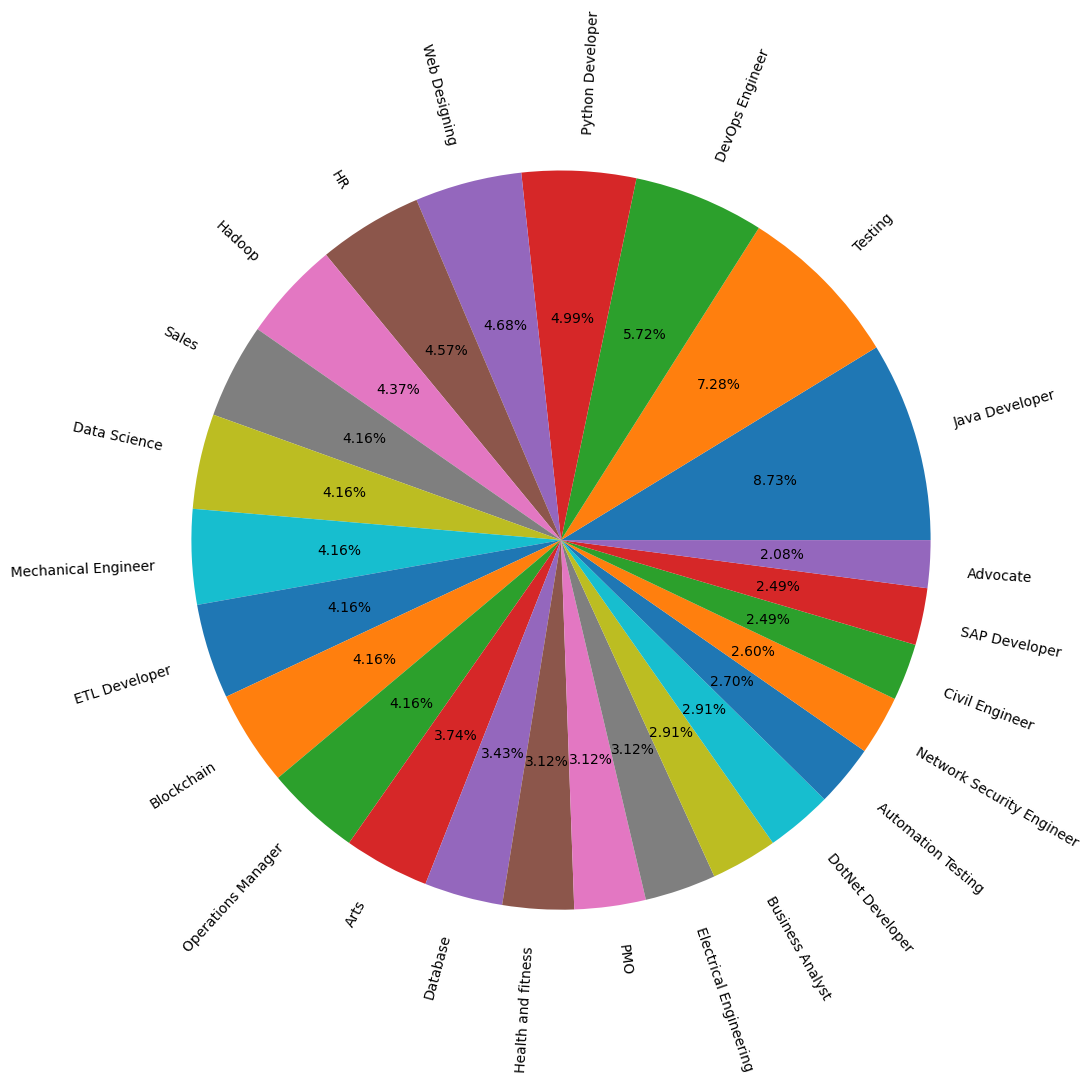

In [54]:
vc = y.value_counts()
plt.figure(figsize = (12,12))
plt.pie(vc,labels=vc.index,autopct='%.2f%%',rotatelabels=90);

In [55]:
def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*',' ', resumeText) #URLs
    resumeText = re.sub('RT|cc',' ', resumeText)
    resumeText = re.sub(r'#\S+',' ', resumeText)
    resumeText = re.sub(r'@\S+',' ', resumeText)
    resumeText = re.sub('[%s]'%re.escape(string.punctuation),' ', resumeText)
    resumeText = re.sub('[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub(r'\s+',' ', resumeText)
    return resumeText
cleanResume(x[0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [56]:
cleanResume(', जिसे jisse')

' jisse'

In [57]:
cleaned = x.apply(cleanResume)
cleaned_data = cleaned.sum()
cleaned_data

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

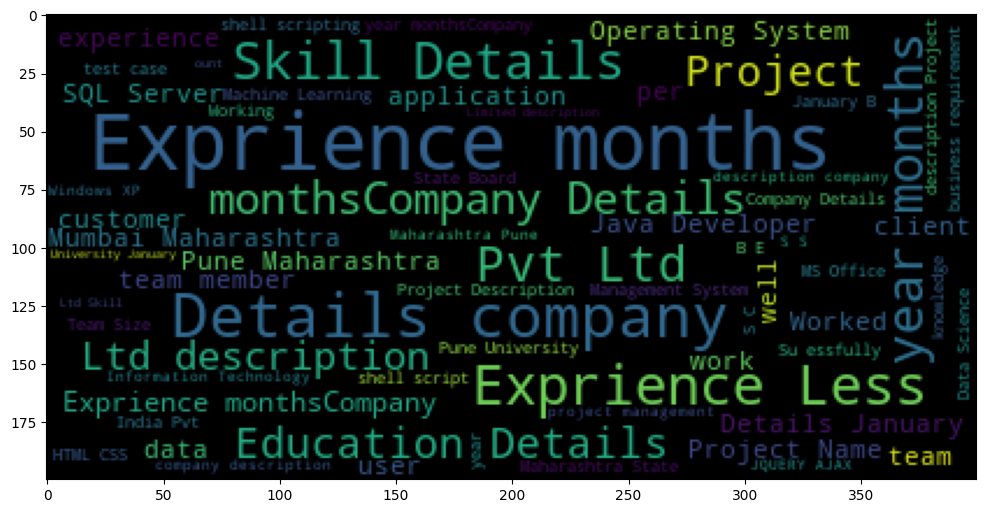

In [58]:
wcloud = WordCloud().generate(cleaned_data)
plt.figure(figsize = (12,8))
plt.imshow(wcloud)

In [59]:
wcloud.words_

{'Exprience months': 1.0,
 'Details company': 0.5502304147465438,
 'Exprience Less': 0.523963133640553,
 'Skill Details': 0.4433179723502304,
 'year months': 0.4235023041474654,
 'Pvt Ltd': 0.4023041474654378,
 'monthsCompany Details': 0.343778801843318,
 'Education Details': 0.3230414746543779,
 'Project': 0.31797235023041476,
 'Ltd description': 0.2907834101382488,
 'Exprience monthsCompany': 0.24055299539170508,
 'Details January': 0.18755760368663593,
 'Pune Maharashtra': 0.1815668202764977,
 'SQL Server': 0.17327188940092167,
 'data': 0.16129032258064516,
 'per': 0.15898617511520738,
 'client': 0.1585253456221198,
 'application': 0.1534562211981567,
 'customer': 0.14838709677419354,
 'team': 0.14516129032258066,
 'Worked': 0.14285714285714285,
 'user': 0.13410138248847928,
 'Java Developer': 0.12903225806451613,
 'Mumbai Maharashtra': 0.12857142857142856,
 'experience': 0.12165898617511521,
 'Project Name': 0.11428571428571428,
 'Operating System': 0.11290322580645161,
 'team memb

<h1>TFIDF</h1>

In [60]:
tfidf = TfidfVectorizer(stop_words='english')

In [61]:
x_new = tfidf.fit_transform(cleaned)
x_new.shape

(962, 7351)

In [62]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'],
      shape=(7351,), dtype=object)

<h1>Splitting Data</h1>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,random_state= 0 ,stratify=y)
X_train.shape,X_test.shape

<h1>Model Creation</h1>

In [80]:
nc = NearestCentroid()
nc.fit(X_train,y_train)


C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01847128, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(721, 7351))

In [67]:
nc.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [74]:
y_pred = nc.predict(X_test)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

0.9875518672199171

<h1>Reading resume</h1>

In [85]:
with open('resume.txt','r') as f:
    text = f.read()
    cleaned_text = cleanResume(text)
    resume = tfidf.transform([cleaned_text])
    
nc.predict(resume) 

array(['Data Science'], dtype=object)

<h1>Reading docx</h1>

In [86]:
from spire.doc import Document,FixedLayoutDocument

In [90]:
document = Document()
document.LoadFromFile('../datasets/SPP.docx') #load the data
text = document.GetText() #getting text from data
print(text)

Evaluation Warning: The document was created with Spire.Doc for Python.
Mr. Satish Prakashrao Pise
Email – satish.pise.sgp@gmail.com				Contact No. 9096679875,7768962144
Objective
Work with professional organization and contribute my excellent work with result oriented performance for continuous improvement in quality and development.  
Experience – 6.3 Years
1.  Current working in Sanjay Ghodawat Polytechnic, Kolhapur.
* Post-Lecturer 
* Duration- 4.3 years, 1st June 2013 to till date
* Responsibilities - Teaching, guiding, motivating students as a class teacher, lecturer, and working as a lab in-charge, spoken tutorial project, IIT Bombay coordinator.
Organizing and conducting trainings for students.
* Subject Taught – RDBMS, CNE, CMF, CHM, CHN, NMA, LPR, DLS, GUI, BWP.
2.  Samarth Polytechnic Belhe, Pune
* Post-Lecturer(Ad-hoc)
* Duration-8months, August 2012 to April 2013
* Responsibilities – Teaching.
* Subject Taught – CMF, MIS, MAN
3.  Late. N.B. Chhabada Institute of Engineerin

In [91]:
cleaned_text = cleanResume(text)
resume = tfidf.transform([cleaned_text])
    
nc.predict(resume)

array(['Testing'], dtype=object)